# A4 - Analyzing Selected Repositories Modules
This notebooks analyzes python modules features from repositories that had Python or Jupyter Notebook as a Primary Language. First we will analyze generrally and then specifically from Jupyter Notebooks and Python Files


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from src.config.states import REP_FINISHED, NB_AGGREGATED, PF_AGGREGATED
from src.db.database import connect, Repository, Notebook, PythonFile
from src.helpers.h7_analysis_helpers import get_toplevel_modules, display_counts

### What are the most popular modules in Data Science Projects coded in Python?
Now that we found out that Python is the most used language, either in python files or in jupyter notebooks , let's find out what are the most used modules and how they are used.

In [2]:
with connect() as session:
    num_repositories = session.query(Repository).filter(Repository.state == REP_FINISHED).count()
    modules = pd.read_sql_table("modules", session.connection())
    modules = get_toplevel_modules(modules)
    print("In the {} valid repositories we found {} modules in valid python files and jupyter notebooks."
          .format(num_repositories, len(modules)))

In the 8 valid repositories we found 417 modules in valid python files and jupyter notebooks.


#### Most Popular Modules

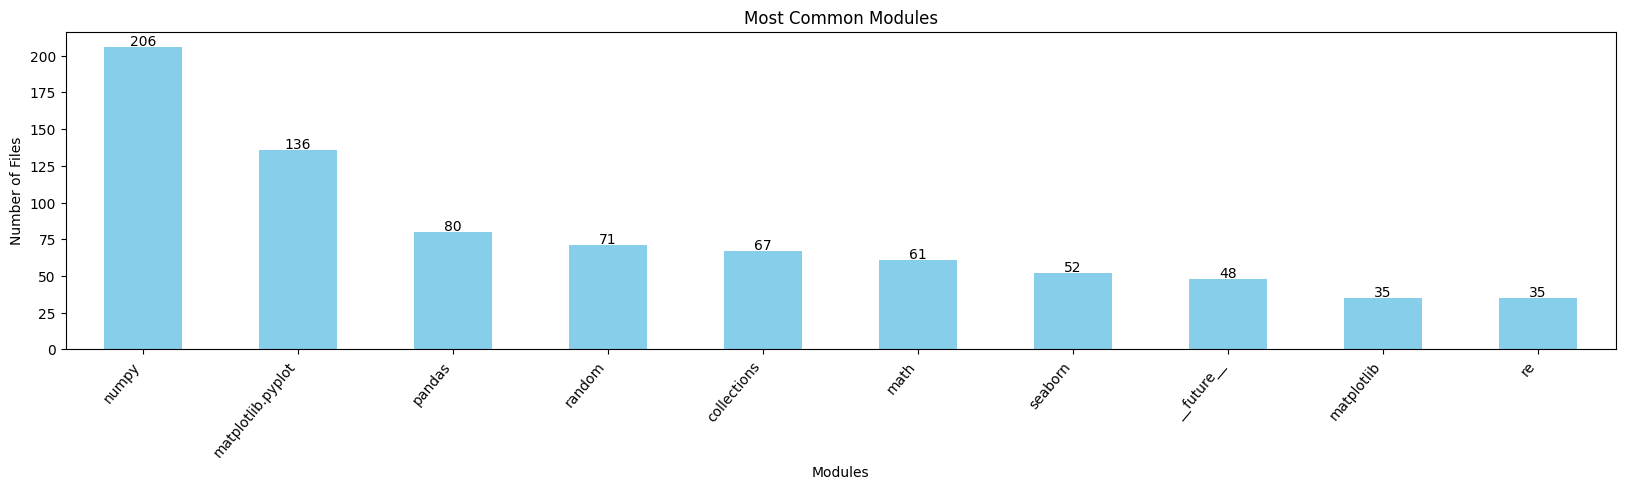

In [3]:
fig1, ax1, count1 = display_counts(modules["any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False,color=['skyblue'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
ax1.legend().set_visible(False)
ax1.set_title("Most Common Modules")
ax1.set_ylabel("Number of Files")
ax1.set_xlabel("Modules");

#### Most Common Toplevel Modules
Since modules can be nested in Python, a top level module is the topmost one in a import.

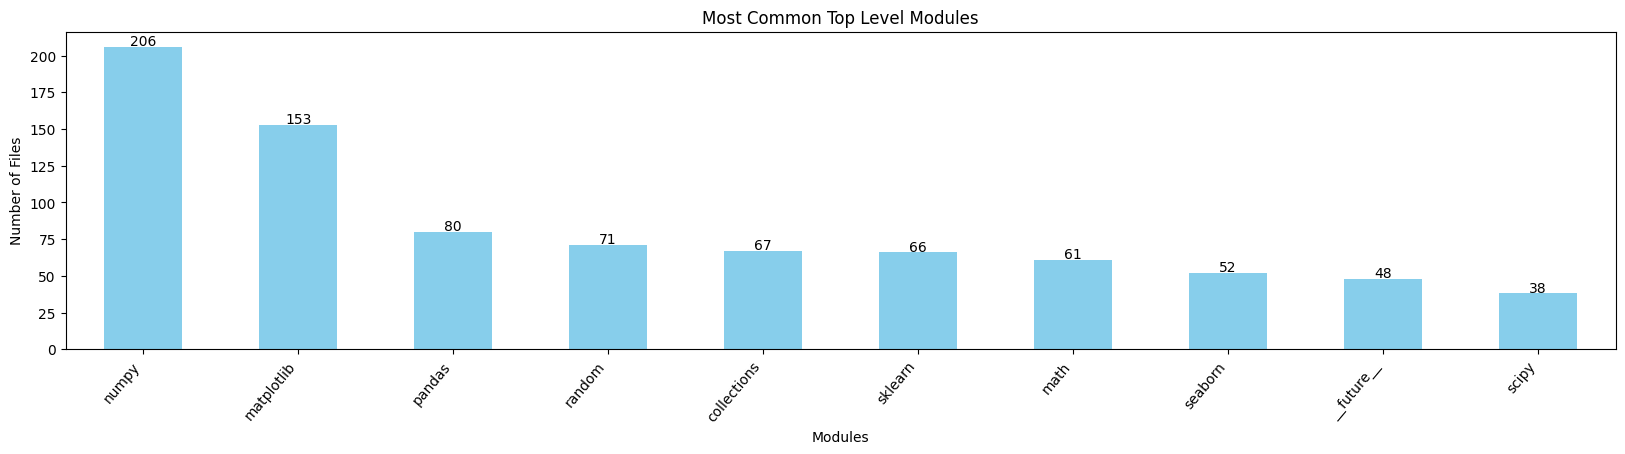

In [4]:
fig2, ax2, count2 = display_counts(modules["toplevel_any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='skyblue')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50, ha="right")
ax2.legend().set_visible(False)
ax2.set_title("Most Common Top Level Modules")
ax2.set_ylabel("Number of Files")
ax2.set_xlabel("Modules");

#### Most Used Import Types
In Python there are two ways to import modules:
- import: `import numpy`
- import_from: `from sklearn import datasets`

With IPyhton you can also use:
- load_ext: `%load_ext autoreload`

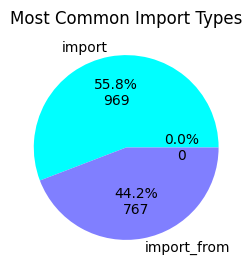

In [5]:
imports = modules[["any_import_count", "any_import_from_count", "any_load_ext_count"]].sum()\
    .rename(lambda x: x[:-6]).rename_axis('Types')\
    .to_frame("Modules").reset_index(drop=False).sort_values(by='Types')

fig3, ax3 = plt.subplots( figsize=(3,3))
imports.plot\
    .pie(ax=ax3, y="Modules", title="Most Common Import Types",
         labels=["import", "import_from", "load_ext"], ylabel='',cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value,(imports["Modules"].sum())*prct_value/100)) )\
    .get_legend().remove()


#### Module Location Type
In Python you can both import local and external modules.

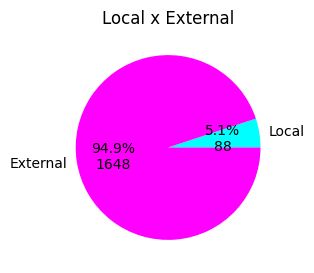

In [6]:
local = modules["local_any_count"].sum()
external = modules["external_any_count"].sum()
location = pd.DataFrame({'Type':['local','external'], 'Modules':[local,external]})

fig4, ax4 = plt.subplots( figsize=(3,3))
location.plot\
    .pie(ax=ax4, y="Modules", title="Local x External",
         labels=["Local", "External"], ylabel='',cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value,(imports["Modules"].sum())*prct_value/100)) )\
    .get_legend().remove()

### Jupyter Notebooks
How are modules used in the Jupyter Notebooks we found specifically.

In [7]:
valid_notebooks = session.query(Notebook).filter(Notebook.state==NB_AGGREGATED).count()
notebook_modules = modules[modules.type=='notebook']
sum_modules = notebook_modules.any_any_count.sum()
all_modules = modules.any_any_count.sum()
percentage = sum_modules / all_modules * 100
print("In the %d valid Jupyter Notebooks we found %d modules (%.2f%% of %d modules found)"
      % (valid_notebooks, sum_modules, percentage, all_modules))

In the 265 valid Jupyter Notebooks we found 1014 modules (59.06% of 1717 modules found)


#### Most Popular Modules

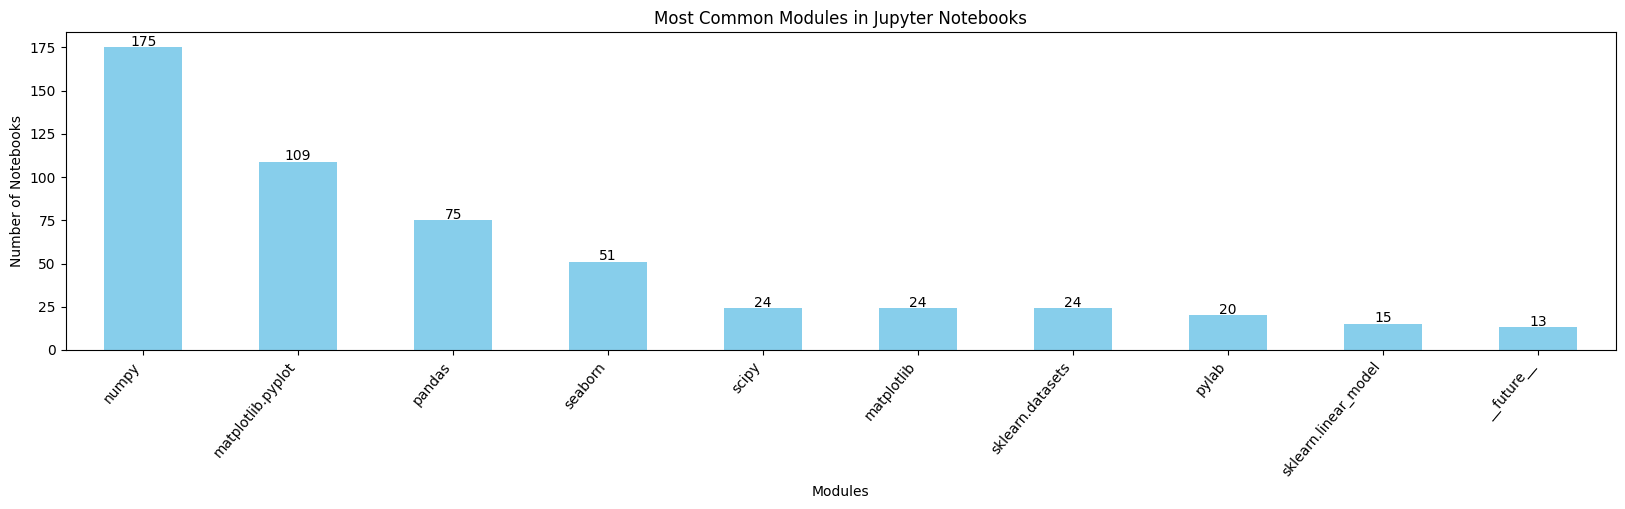

In [8]:
fig5, ax5, count5 = display_counts(notebook_modules["any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False,color='skyblue')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=50, ha="right")
ax5.legend().set_visible(False)
ax5.set_title("Most Common Modules in Jupyter Notebooks")
ax5.set_ylabel("Number of Notebooks")
ax5.set_xlabel("Modules");

#### Most Common Toplevel Modules

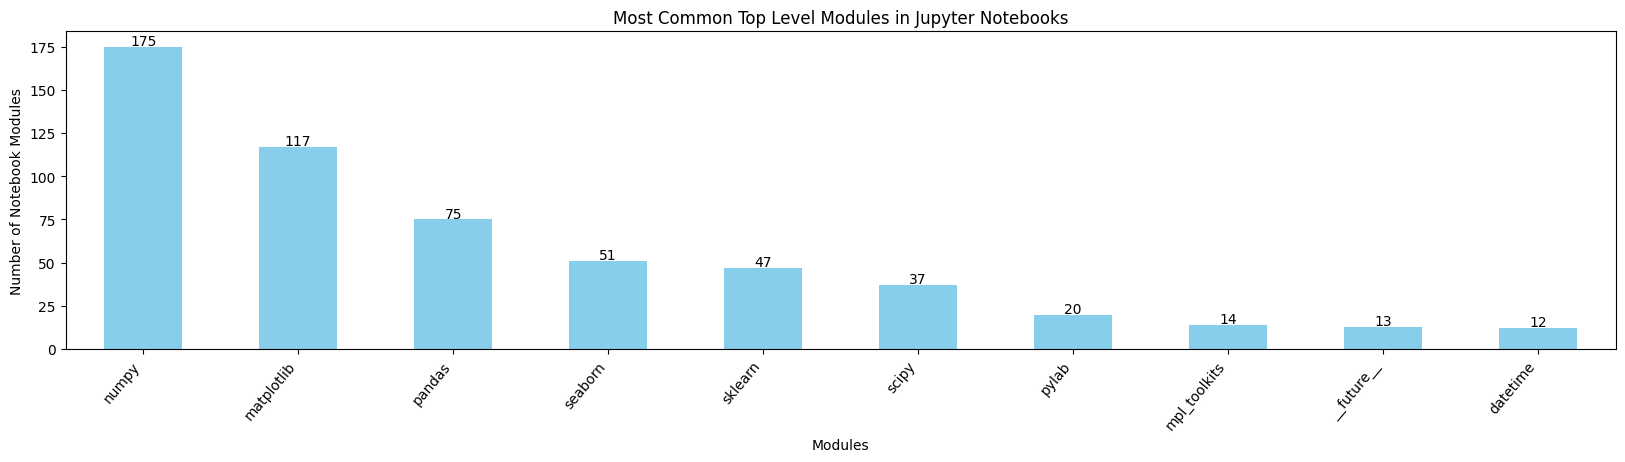

In [9]:
fig6, ax6, count6 = display_counts(notebook_modules["toplevel_any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='skyblue')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=50, ha="right")
ax6.legend().set_visible(False)
ax6.set_title("Most Common Top Level Modules in Jupyter Notebooks")
ax6.set_ylabel("Number of Notebook Modules")
ax6.set_xlabel("Modules");

#### Most Used Import Types

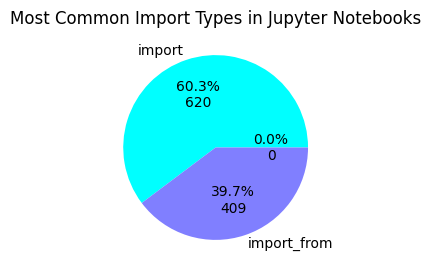

In [10]:
imports = notebook_modules[["any_import_count", "any_import_from_count", "any_load_ext_count"]].sum()\
    .rename(lambda x: x[:-6]).rename_axis('Types')\
    .to_frame("Modules").reset_index(drop=False).sort_values(by='Types')

fig7, ax7 = plt.subplots( figsize=(3,3))
imports.plot\
    .pie(ax=ax7, y="Modules", title="Most Common Import Types in Jupyter Notebooks",
         labels=["import", "import_from", "load_ext"], ylabel='',cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value,(imports["Modules"].sum())*prct_value/100)) )\
    .get_legend().remove()

#### Module Location Type

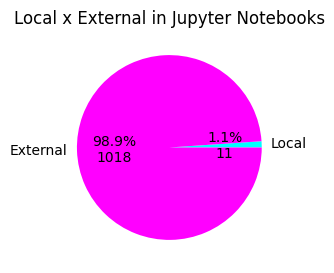

In [11]:
local = notebook_modules["local_any_count"].sum()
external = notebook_modules["external_any_count"].sum()
location = pd.DataFrame({'Type':['local','external'], 'Modules':[local,external]})

fig8, ax8 = plt.subplots( figsize=(3,3))
location.plot\
    .pie(ax=ax8, y="Modules", title="Local x External in Jupyter Notebooks",
         labels=["Local", "External"], ylabel='',cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value,(imports["Modules"].sum())*prct_value/100)) )\
    .get_legend().remove()

### Python Files
How are modules used in the Jupyter Notebooks we found specifically.

In [12]:
valid_python_files = session.query(PythonFile).filter(PythonFile.state==PF_AGGREGATED).count()
python_file_modules = modules[modules.type=='python_file']
sum_modules2 = python_file_modules.any_any_count.sum()
all_modules2 = modules.any_any_count.sum()
percentage2 = sum_modules2 / all_modules2 * 100
print("In the %d valid Jupyter Notebooks we found %d modules (%.2f%% of %d modules found)"
      % (valid_python_files, sum_modules2, percentage2, all_modules2))

In the 152 valid Jupyter Notebooks we found 703 modules (40.94% of 1717 modules found)


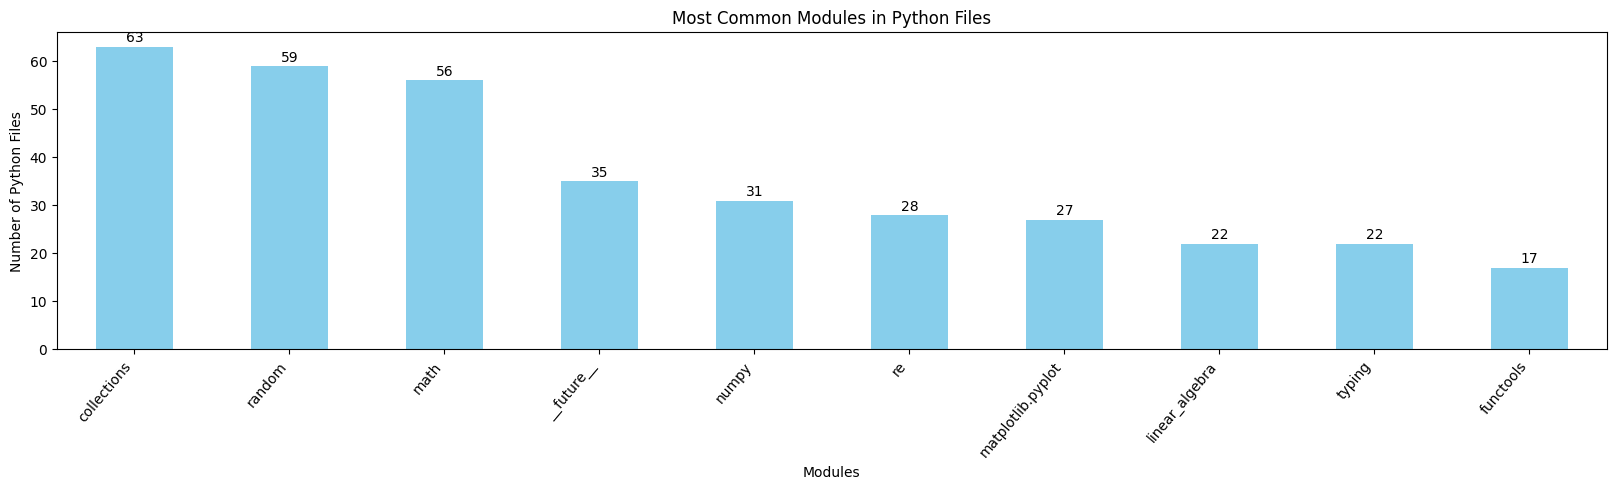

In [13]:
fig9, ax9, count9 = display_counts(python_file_modules["any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='skyblue')
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=50, ha="right")
ax9.legend().set_visible(False)
ax9.set_title("Most Common Modules in Python Files")
ax9.set_ylabel("Number of Python Files")
ax9.set_xlabel("Modules");

#### Most Popular Modules

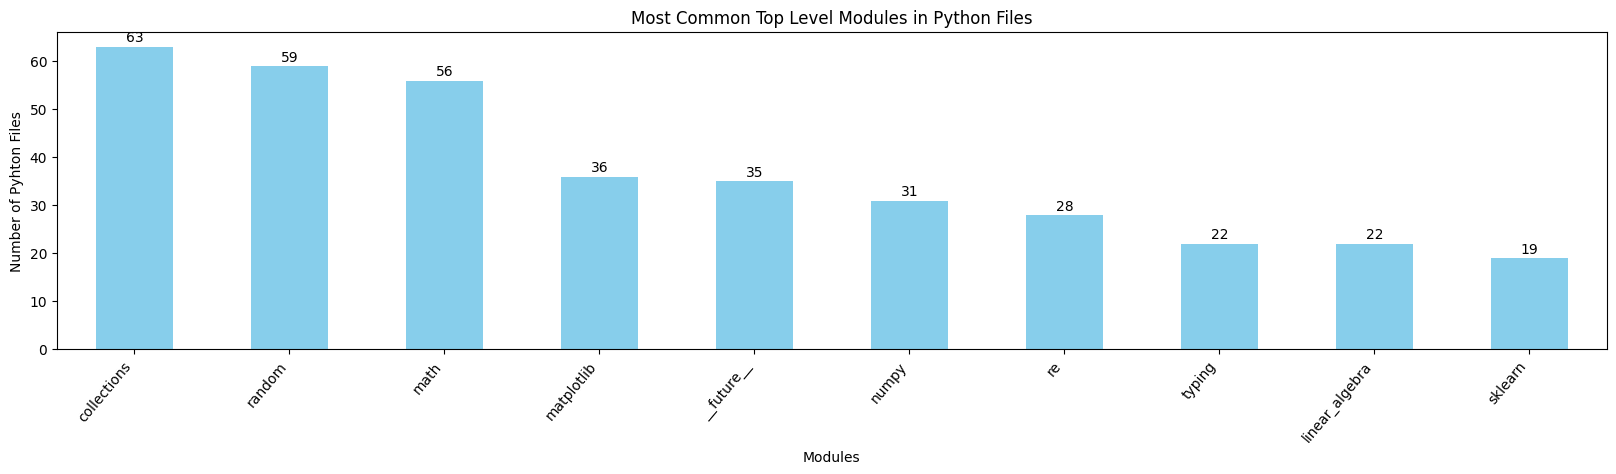

In [14]:
fig10, ax10, count10 = display_counts(python_file_modules["toplevel_any_any"], width=20, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='skyblue')
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=50, ha="right")
ax10.legend().set_visible(False)
ax10.set_title("Most Common Top Level Modules in Python Files")
ax10.set_ylabel("Number of Pyhton Files")
ax10.set_xlabel("Modules");

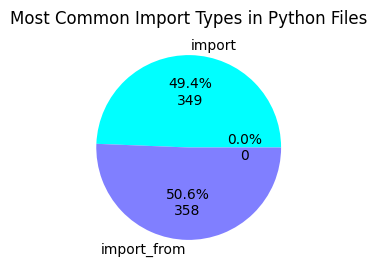

In [15]:

imports = python_file_modules[["any_import_count", "any_import_from_count", "any_load_ext_count"]].sum() \
    .rename(lambda x: x[:-6]).rename_axis('Types') \
    .to_frame("Modules").reset_index(drop=False).sort_values(by='Types')

fig11, ax11 = plt.subplots(figsize=(3, 3))
imports.plot \
    .pie(ax=ax11, y="Modules", title="Most Common Import Types in Python Files",
         labels=["import", "import_from", "load_ext"], ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (imports["Modules"].sum()) * prct_value / 100))) \
    .get_legend().remove()

#### Most Used Import Types

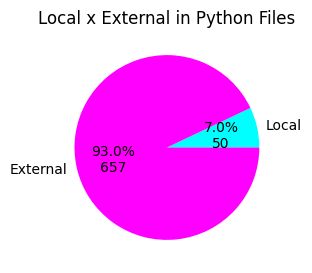

In [16]:
local = python_file_modules["local_any_count"].sum()
external = notebook_modules["external_any_count"].sum()
location = pd.DataFrame({'Type': ['local', 'external'], 'Modules': [local, external]})

fig12, ax12 = plt.subplots(figsize=(3, 3))
location.plot \
    .pie(ax=ax12, y="Modules", title="Local x External in Python Files",
         labels=["Local", "External"], ylabel='', cmap="cool",
         autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                  .format(prct_value, (imports["Modules"].sum()) * prct_value / 100))) \
    .get_legend().remove()